# KNN Implementation on scaled reduced dataset with LDA

In [ ]:
# Utilities
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt

# Models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, accuracy_score, f1_score
from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
seed = 23

In [ ]:
df_scaled = pd.read_csv('../../Data/dataset_preprocessed.csv')

In [ ]:
df_lda = pd.read_csv('../../DimensionalityReductionData/lda.csv')

In [ ]:
df_scaled = df_scaled[['averageRating']]
df_scaled['LD1'] = df_lda['LD1']

<ipython-input-12-529454da6465>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scaled['LD1'] = df_lda['LD1']


In [ ]:
df_scaled_sample = df_scaled

In [ ]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    df_scaled_sample.drop('averageRating', axis=1),
    df_scaled_sample['averageRating'], test_size=test_size,
    random_state=seed
)

In [ ]:
def calculate_metrics(model_name, y_true, y_pred):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Weighted F1': f1_score(y_true, y_pred, average='weighted'),
        'Weighted Precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'Weighted Recall': recall_score(y_true, y_pred, average='weighted'),
        'Macro-Averaged Precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
        'Macro-Averaged Recall': recall_score(y_true, y_pred, average='macro'),
        'F1': str(f1_score(y_true, y_pred, average=None)),
        'Precision': str( precision_score(y_true, y_pred, average=None, zero_division=0)),
    }

    # Print the metrics
    print(f"Metrics for {model_name}:")
    for metric_name, metric_value in metrics.items():
        try:
            print(f"{metric_name}: {metric_value:.4f}")
        except:
            print(f"{metric_name}: {metric_value}")

    # Print the classification report
    print("classification report")
    report = classification_report(y_true, y_pred, target_names=['Class 0', 'Class 1'], zero_division=0)
    print(report)

    print("Confusion Matrix")
    cm = confusion_matrix(y_true, y_pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
    cmd.plot()

    plt.title(f'Confusion matrix for model {model_name} (Accuracy:{metrics["Accuracy"]:.4f})')
    plt.show()

    # Create df to store metrics
    df_metrics = pd.DataFrame(metrics, index=[model_name])

    return df_metrics

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

print("F1 score:", f1_score(y_test, predictions, average=None))

Accuracy: 0.5892738174550299
F1 score: [0.59928502 0.57874957]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

param_grid = {
    'n_neighbors': [3, 7, 15],
    'p': [1, 2, 3, 4.3],
    'n_jobs': [-1, 1]
}

model = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("The parameters with the highest score: ", grid_search.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
The parameters with the highest score:  {'n_jobs': -1, 'n_neighbors': 15, 'p': 1}


In [ ]:
cv_results_df = pd.DataFrame(grid_search.cv_results_)

# Show top 10 parameters for this model
minimalistic_results = cv_results_df[['params', 'mean_test_score']]
sorted_results = minimalistic_results.sort_values(by='mean_test_score', ascending=False)

print(sorted_results.head(10))

                                         params  mean_test_score
23   {'n_jobs': 1, 'n_neighbors': 15, 'p': 4.3}         0.621460
22     {'n_jobs': 1, 'n_neighbors': 15, 'p': 3}         0.621460
21     {'n_jobs': 1, 'n_neighbors': 15, 'p': 2}         0.621460
8     {'n_jobs': -1, 'n_neighbors': 15, 'p': 1}         0.621460
9     {'n_jobs': -1, 'n_neighbors': 15, 'p': 2}         0.621460
10    {'n_jobs': -1, 'n_neighbors': 15, 'p': 3}         0.621460
11  {'n_jobs': -1, 'n_neighbors': 15, 'p': 4.3}         0.621460
20     {'n_jobs': 1, 'n_neighbors': 15, 'p': 1}         0.621460
16      {'n_jobs': 1, 'n_neighbors': 7, 'p': 1}         0.609797
4      {'n_jobs': -1, 'n_neighbors': 7, 'p': 1}         0.609797


Metrics for KNN-LDA-GS-CV1:
Accuracy: 0.6336
Weighted F1: 0.6337
Weighted Precision: 0.6338
Weighted Recall: 0.6336
Macro-Averaged Precision: 0.6330
Macro-Averaged Recall: 0.6331
F1: [0.64720975 0.61884962]
Precision: [0.65138799 0.6145905 ]
classification report
              precision    recall  f1-score   support

     Class 0       0.65      0.64      0.65      1569
     Class 1       0.61      0.62      0.62      1433

    accuracy                           0.63      3002
   macro avg       0.63      0.63      0.63      3002
weighted avg       0.63      0.63      0.63      3002

Confusion Matrix


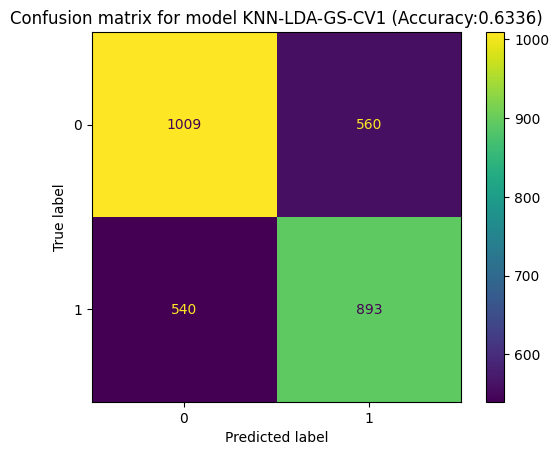

In [ ]:
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
_ = calculate_metrics('KNN-LDA-GS-CV1', y_test, predictions)

In [ ]:
# Predicting using other alternatives of fine-tuning from top 10 performances
other_alternatives = []
# Choose a set of parameters from sorted_results
for i in range(10):

  params = sorted_results.iloc[i]['params']
  print("Parameters from place: ", i, " ", params)

  model = KNeighborsClassifier(**params)
  model.fit(X_train, y_train)

  predictions = model.predict(X_test)

  chosen_accuracy = accuracy_score(y_test, predictions)
  print("Accuracy for chosen parameters:", chosen_accuracy)
  other_alternatives.append((chosen_accuracy,params))

Parameters from place:  0   {'n_jobs': 1, 'n_neighbors': 15, 'p': 4.3}
Accuracy for chosen parameters: 0.6335776149233844
Parameters from place:  1   {'n_jobs': 1, 'n_neighbors': 15, 'p': 3}
Accuracy for chosen parameters: 0.6335776149233844
Parameters from place:  2   {'n_jobs': 1, 'n_neighbors': 15, 'p': 2}
Accuracy for chosen parameters: 0.6335776149233844
Parameters from place:  3   {'n_jobs': -1, 'n_neighbors': 15, 'p': 1}
Accuracy for chosen parameters: 0.6335776149233844
Parameters from place:  4   {'n_jobs': -1, 'n_neighbors': 15, 'p': 2}
Accuracy for chosen parameters: 0.6335776149233844
Parameters from place:  5   {'n_jobs': -1, 'n_neighbors': 15, 'p': 3}
Accuracy for chosen parameters: 0.6335776149233844
Parameters from place:  6   {'n_jobs': -1, 'n_neighbors': 15, 'p': 4.3}
Accuracy for chosen parameters: 0.6335776149233844
Parameters from place:  7   {'n_jobs': 1, 'n_neighbors': 15, 'p': 1}
Accuracy for chosen parameters: 0.6335776149233844
Parameters from place:  8   {'n_

In [ ]:
# get best from top 10
best_tuple = max(other_alternatives, key=lambda x: x[0])

In [ ]:
print("Best accuracy and parameters after running the algorithm using other alternatives of fine tuning from top 10 performances")
print(best_tuple[0])
print(best_tuple[1])

Best accuracy and parameters after running the algorithm using other alternatives of fine tuning from top 10 performances
0.6335776149233844
{'n_jobs': 1, 'n_neighbors': 15, 'p': 4.3}


In [ ]:
# Run on training sample

# Choose a set of parameters from sorted_results
for i in range(10):

  params = sorted_results.iloc[i]['params']
  print("Parameters from place: ", i, " ", params)

  model = KNeighborsClassifier(**params)
  model.fit(X_train, y_train)

  predictions = model.predict(X_train)

  chosen_accuracy = accuracy_score(y_train, predictions)
  print("Accuracy for chosen parameters:", chosen_accuracy)

Parameters from place:  0   {'n_jobs': 1, 'n_neighbors': 15, 'p': 4.3}
Accuracy for chosen parameters: 0.6808563812062646
Parameters from place:  1   {'n_jobs': 1, 'n_neighbors': 15, 'p': 3}
Accuracy for chosen parameters: 0.6808563812062646
Parameters from place:  2   {'n_jobs': 1, 'n_neighbors': 15, 'p': 2}
Accuracy for chosen parameters: 0.6808563812062646
Parameters from place:  3   {'n_jobs': -1, 'n_neighbors': 15, 'p': 1}
Accuracy for chosen parameters: 0.6808563812062646
Parameters from place:  4   {'n_jobs': -1, 'n_neighbors': 15, 'p': 2}
Accuracy for chosen parameters: 0.6808563812062646
Parameters from place:  5   {'n_jobs': -1, 'n_neighbors': 15, 'p': 3}
Accuracy for chosen parameters: 0.6808563812062646
Parameters from place:  6   {'n_jobs': -1, 'n_neighbors': 15, 'p': 4.3}
Accuracy for chosen parameters: 0.6808563812062646
Parameters from place:  7   {'n_jobs': 1, 'n_neighbors': 15, 'p': 1}
Accuracy for chosen parameters: 0.6808563812062646
Parameters from place:  8   {'n_